In [46]:
import matplotlib.pyplot as plt

In [47]:
from sklearn import datasets, svm, metrics

In [48]:
digits = datasets.load_digits()

In [49]:
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [50]:
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [51]:
digits.target[150]

0

In [52]:
digits.images[150]

array([[  0.,   0.,   2.,  12.,   4.,   0.,   0.,   0.],
       [  0.,   1.,  12.,  16.,  16.,   3.,   0.,   0.],
       [  0.,   7.,  16.,   6.,   4.,  13.,   0.,   0.],
       [  0.,   8.,  16.,   6.,   0.,  13.,   5.,   0.],
       [  0.,   1.,  16.,   5.,   0.,   7.,   9.,   0.],
       [  0.,   0.,  16.,   8.,   0.,   8.,  12.,   0.],
       [  0.,   0.,  13.,  14.,  14.,  16.,  10.,   0.],
       [  0.,   0.,   4.,  14.,  15.,   7.,   0.,   0.]])

In [53]:
list(zip(digits.images, digits.target))

[(array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
         [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
         [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
         [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
         [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
         [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
         [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
         [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]]), 0),
 (array([[  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.],
         [  0.,   0.,   0.,  11.,  16.,   9.,   0.,   0.],
         [  0.,   0.,   3.,  15.,  16.,   6.,   0.,   0.],
         [  0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.],
         [  0.,   0.,   1.,  16.,  16.,   3.,   0.,   0.],
         [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
         [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
         [  0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.]]), 1),
 (array([[  0.,   0.,   0.,   4.,  15.,  12.

In [54]:
images_and_labels = list(zip(digits.images, digits.target))

In [55]:
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [56]:
n_samples = len(digits.images)

In [57]:
n_samples

1797

In [58]:
data = digits.images.reshape((n_samples, -1))

In [59]:
data[150]

array([  0.,   0.,   2.,  12.,   4.,   0.,   0.,   0.,   0.,   1.,  12.,
        16.,  16.,   3.,   0.,   0.,   0.,   7.,  16.,   6.,   4.,  13.,
         0.,   0.,   0.,   8.,  16.,   6.,   0.,  13.,   5.,   0.,   0.,
         1.,  16.,   5.,   0.,   7.,   9.,   0.,   0.,   0.,  16.,   8.,
         0.,   8.,  12.,   0.,   0.,   0.,  13.,  14.,  14.,  16.,  10.,
         0.,   0.,   0.,   4.,  14.,  15.,   7.,   0.,   0.])

In [60]:
classifier = svm.SVC(gamma=0.001)

In [61]:
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [62]:
predicted = classifier.predict(data[n_samples // 2:])

In [63]:
test_labels = digits.target[n_samples // 2:]

In [64]:
rep = metrics.classification_report(test_labels, predicted)

In [65]:
rep

'             precision    recall  f1-score   support\n\n          0       1.00      0.99      0.99        88\n          1       0.99      0.97      0.98        91\n          2       0.99      0.99      0.99        86\n          3       0.98      0.87      0.92        91\n          4       0.99      0.96      0.97        92\n          5       0.95      0.97      0.96        91\n          6       0.99      0.99      0.99        91\n          7       0.96      0.99      0.97        89\n          8       0.94      1.00      0.97        88\n          9       0.93      0.98      0.95        92\n\navg / total       0.97      0.97      0.97       899\n'

In [66]:
rep1 = metrics.confusion_matrix(test_labels, predicted)
rep1

array([[87,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 88,  1,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 85,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 79,  0,  3,  0,  4,  5,  0],
       [ 0,  0,  0,  0, 88,  0,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0, 88,  1,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 90,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 88,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 88,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 90]], dtype=int64)

In [67]:
test_digit = ([  0.,   0.,   2.,  12.,   4.,   0.,   0.,   0.,   0.,   1.,  12.,
        16.,  16.,   3.,   0.,   0.,   0.,   7.,  16.,   6.,   4.,  13.,
         0.,   0.,   0.,   8.,  16.,   6.,   0.,  13.,   5.,   0.,   0.,
         1.,  16.,   5.,   0.,   7.,   9.,   0.,   0.,   0.,  16.,   8.,
         0.,   8.,  12.,   0.,   0.,   0.,  13.,  14.,  14.,  16.,  10.,
         0.,   0.,   0.,   4.,  14.,  15.,   7.,   0.,   0.], 
              [  0.,   0.,   2.,  12.,   4.,   0.,   0.,   0.,   0.,   1.,  12.,
        16.,  16.,   3.,   0.,   0.,   0.,   7.,  16.,   6.,   4.,  13.,
         0.,   0.,   0.,   8.,  16.,   6.,   0.,  13.,   5.,   0.,   0.,
         1.,  16.,   5.,   0.,   7.,   9.,   0.,   0.,   0.,  16.,   8.,
         0.,   8.,  12.,   0.,   0.,   0.,  13.,  14.,  14.,  16.,  10.,
         0.,   0.,   0.,   4.,  14.,  15.,   7.,   0.,   0.])

In [69]:
len(test_digit)

2

In [70]:
predict_digit = classifier.predict(test_digit)

In [71]:
predict_digit

array([0, 0])

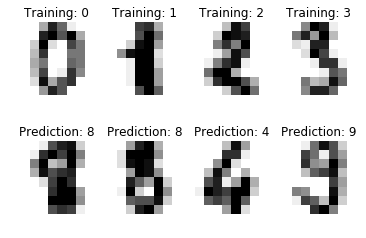

In [72]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

In [73]:
import PIL

In [74]:
from PIL import Image
import numpy as np

In [92]:
apple = Image.open("C://Users/583175/Pictures/apple.jpg")
appleBW = Image.open("C://Users/583175/Pictures/appleBW.png")
orange = Image.open("C://Users/583175/Pictures/orange.jpg")
zero = Image.open("C://Users/583175/Pictures/1.jpg")

In [93]:
appleArr = np.array(apple)
appleBWArr = np.array(appleBW)
orangeArr = np.array(orange)
zeroArr = np.array(zero)

In [94]:
zeroArr.shape

(83, 61, 3)

In [95]:
zeroBW = zero.convert('L')
zeroBW.save("C://Users/583175/Pictures/0BW.jpg")
zeroBWArr = np.array(zeroBW)

In [96]:
zeroBWArr.shape

(83, 61)

In [97]:
dim = 8
#img = Image.open(‘fullsized_image.jpg')
#wpercent = (basewidth / float(img.size[0]))
#hsize = int((float(img.size[1]) * float(wpercent)))
zeroBWresized = zeroBW.resize((dim, dim), PIL.Image.ANTIALIAS)
#img.save(‘resized_image.jpg')

In [98]:
zeroBWresizedArr = np.array(zeroBWresized)

In [99]:
zeroBWresizedArr

array([[255, 255, 255, 255,  90,  68, 248, 255],
       [255, 206, 157,  77,   0,  16, 244, 255],
       [255, 109,  22,  24,   2,  26, 244, 255],
       [255, 253, 255, 223,   0,  23, 244, 255],
       [255, 254, 255, 222,   0,  23, 244, 255],
       [255, 253, 254, 221,   2,  25, 244, 255],
       [255, 253, 255, 220,   0,  14, 244, 255],
       [255, 253, 255, 228,  58,  76, 246, 255]], dtype=uint8)

In [100]:
testImageArr = zeroBWresizedArr.reshape((1, -1))

In [101]:
print(testImageArr)

[[255 255 255 255  90  68 248 255 255 206 157  77   0  16 244 255 255 109
   22  24   2  26 244 255 255 253 255 223   0  23 244 255 255 254 255 222
    0  23 244 255 255 253 254 221   2  25 244 255 255 253 255 220   0  14
  244 255 255 253 255 228  58  76 246 255]]


In [102]:
testImageArr.shape

(1, 64)

In [103]:
predict_testdigit = classifier.predict(testImageArr)
predict_testdigit

array([1])

In [91]:
images_and_labels = list(zip(zeroBWresizedArr, predict_testdigit))
for index, (image, label) in enumerate(images_and_labels[:]):
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Testing: %i' % label)

plt.show()

TypeError: Invalid dimensions for image data